<a href="https://colab.research.google.com/github/PRITHASAMANTA/Basic_Python/blob/main/Pcod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Data collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
data =pd.read_csv('/content/PCOS_infertility (1).csv')


#❓ Step 2: Null Value Handling
We check for and optionally handle missing values.

In [4]:
# Check for missing values
print("\n🔍 Missing values:\n", data.isnull().sum())

# Optional: Drop rows with missing values
# data = data.dropna()



🔍 Missing values:
 Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64


#🧹 Step 3: Data Preprocessing
We'll prepare the data by removing non-numeric or irrelevant columns and separating features from labels.


In [5]:
# Drop non-numeric or irrelevant columns (e.g., 'Blood Group', 'Patient ID' if exists)
columns_to_drop = ['Blood Group', 'Patient ID'] if 'Blood Group' in data.columns else []
data = data.drop(columns=columns_to_drop, errors='ignore')

# Define features and label
X = data.drop("PCOS (Y/N)", axis=1)
y = data["PCOS (Y/N)"]


#📊 Step 4: Data Visualization (Optional)
We visualize the class distribution.

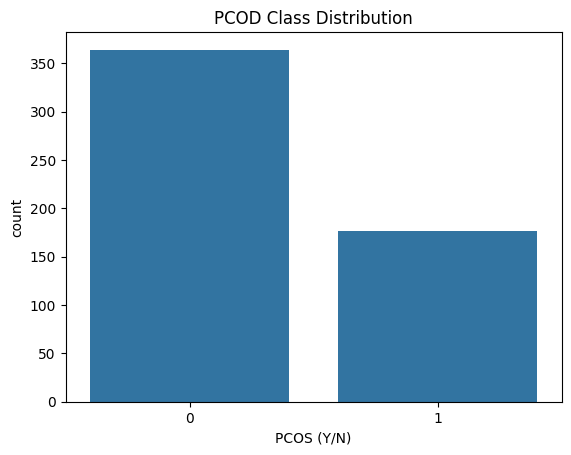

In [6]:


sns.countplot(x=y)
plt.title("PCOD Class Distribution")
plt.show()


#✂️ Step 5: Train-Test Split


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check Non_Numeric columns


In [11]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("🧾 Non-numeric columns:\n", non_numeric_cols)


🧾 Non-numeric columns:
 Index(['AMH(ng/mL)'], dtype='object')


#Handle Non-Numeric Columns


In [12]:
X = X.drop(columns=non_numeric_cols)


#Scale


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Define and Train multiple models


In [15]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Store results
results = {}

# Train and test each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔍 {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Logistic Regression
Accuracy: 0.7064220183486238
Confusion Matrix:
 [[77  0]
 [32  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        77
           1       0.00      0.00      0.00        32

    accuracy                           0.71       109
   macro avg       0.35      0.50      0.41       109
weighted avg       0.50      0.71      0.58       109


🔍 KNN
Accuracy: 0.7155963302752294
Confusion Matrix:
 [[70  7]
 [24  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        77
           1       0.53      0.25      0.34        32

    accuracy                           0.72       109
   macro avg       0.64      0.58      0.58       109
weighted avg       0.68      0.72      0.68       109


🔍 SVM
Accuracy: 0.7064220183486238
Confusion Matrix:
 [[77  0]
 [32  0]]
Classification Report:
               precision    recall  f

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


🔍 Random Forest
Accuracy: 0.7431192660550459
Confusion Matrix:
 [[65 12]
 [16 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.57      0.50      0.53        32

    accuracy                           0.74       109
   macro avg       0.69      0.67      0.68       109
weighted avg       0.73      0.74      0.74       109



#compare model accuracy

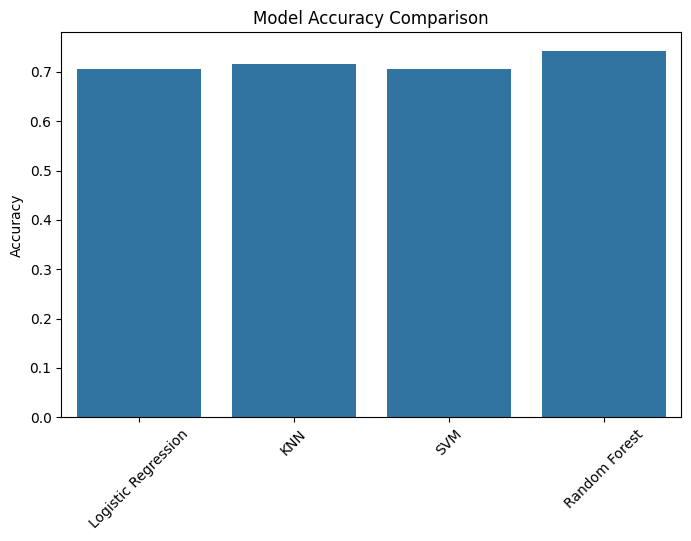

In [16]:
# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


#After plotting, you'll see which model gives the highest accuracy. You can conclude:

“Among Logistic Regression, KNN, SVM, and Random Forest, the <best model> achieved the highest accuracy and performance for detecting PCOD. Random Forest often performs best due to its ensemble nature, but results may vary based on the dataset.”